<a href="https://colab.research.google.com/github/Sourav-Manik/AI-Assignments/blob/main/Assignment_4_Startup_Profit_Prediction_Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Model 2 - Startup Dataset - Profit Prediction**

Model validation techniques used

No transformation applied

#Import Libraries and Datasets

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
startup_data = pd.read_csv('/content/50_Startups.csv')

In [ ]:
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#Data Understanding

In [ ]:
startup_data.shape

(50, 5)

In [ ]:
startup_data.dtypes  

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [ ]:
startup_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
startup_data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

#Data tranformation


In [ ]:
startup_data=pd.get_dummies(startup_data,columns=['State'])

In [ ]:
startup_data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [ ]:
startup_data = startup_data.rename({'R&D Spend': 'RD_exp','Administration': 'Admin_exp','Marketing Spend': 'Marketing_exp','State_New York': 'State_NewYork'}, axis=1)

In [ ]:
startup_data.head()

,RD_exp,Admin_exp,Marketing_exp,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


#Model Building

Model building using Statsmodel

In [ ]:
X = startup_data.drop(labels= ['Profit'],axis = 1)           #Independent variables
y = startup_data[['Profit']]                                 #Dependent variable

In [ ]:
X.head()

,RD_exp,Admin_exp,Marketing_exp,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [ ]:
X.mean()

RD_exp               73721.6156
Admin_exp           121344.6396
Marketing_exp       211025.0978
State_California         0.3400
State_Florida            0.3200
State_NewYork            0.3400
dtype: float64

In [ ]:
X.std()

RD_exp               45902.256482
Admin_exp            28017.802755
Marketing_exp       122290.310726
State_California         0.478518
State_Florida            0.471212
State_NewYork            0.478518
dtype: float64

In [ ]:
#Data showing higher variances as we have not standarized the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,shuffle=True, random_state = 12)

#Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression() #Model Initialization
linear_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
linear_model.intercept_, linear_model.coef_

(array([54575.10349854]),
 array([[ 7.98247569e-01, -6.37013419e-02,  2.98877453e-02,
         -4.67816780e+01, -7.23891700e+02,  7.70673378e+02]]))

#Model Testing

In [ ]:
#Training Data
y_pred_train = linear_model.predict(X_train)

In [ ]:
#Test Data
y_pred_test = linear_model.predict(X_test)

#Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

In [ ]:
train_error = y_train-y_pred_train
train_error.head()

,Profit
17,-4739.127239
38,8398.877590
37,-2379.872574
15,-16859.974220
31,426.489623


In [ ]:
#training data
MSE = mean_squared_error(y_train,y_pred_train)
MSE

82100155.28397563

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_train,y_pred_train))
RMSE

9060.913600955239

In [ ]:
R_squared = r2_score(y_train,y_pred_train)
R_squared

0.9487195349700054

In [ ]:
#test data
MSE = mean_squared_error(y_test,y_pred_test)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred_test))
RMSE

8508.731962921634

In [ ]:
R_squared = r2_score(y_test,y_pred_test)
R_squared

0.9473897619187811

#Assumption Check

##Linearity Test

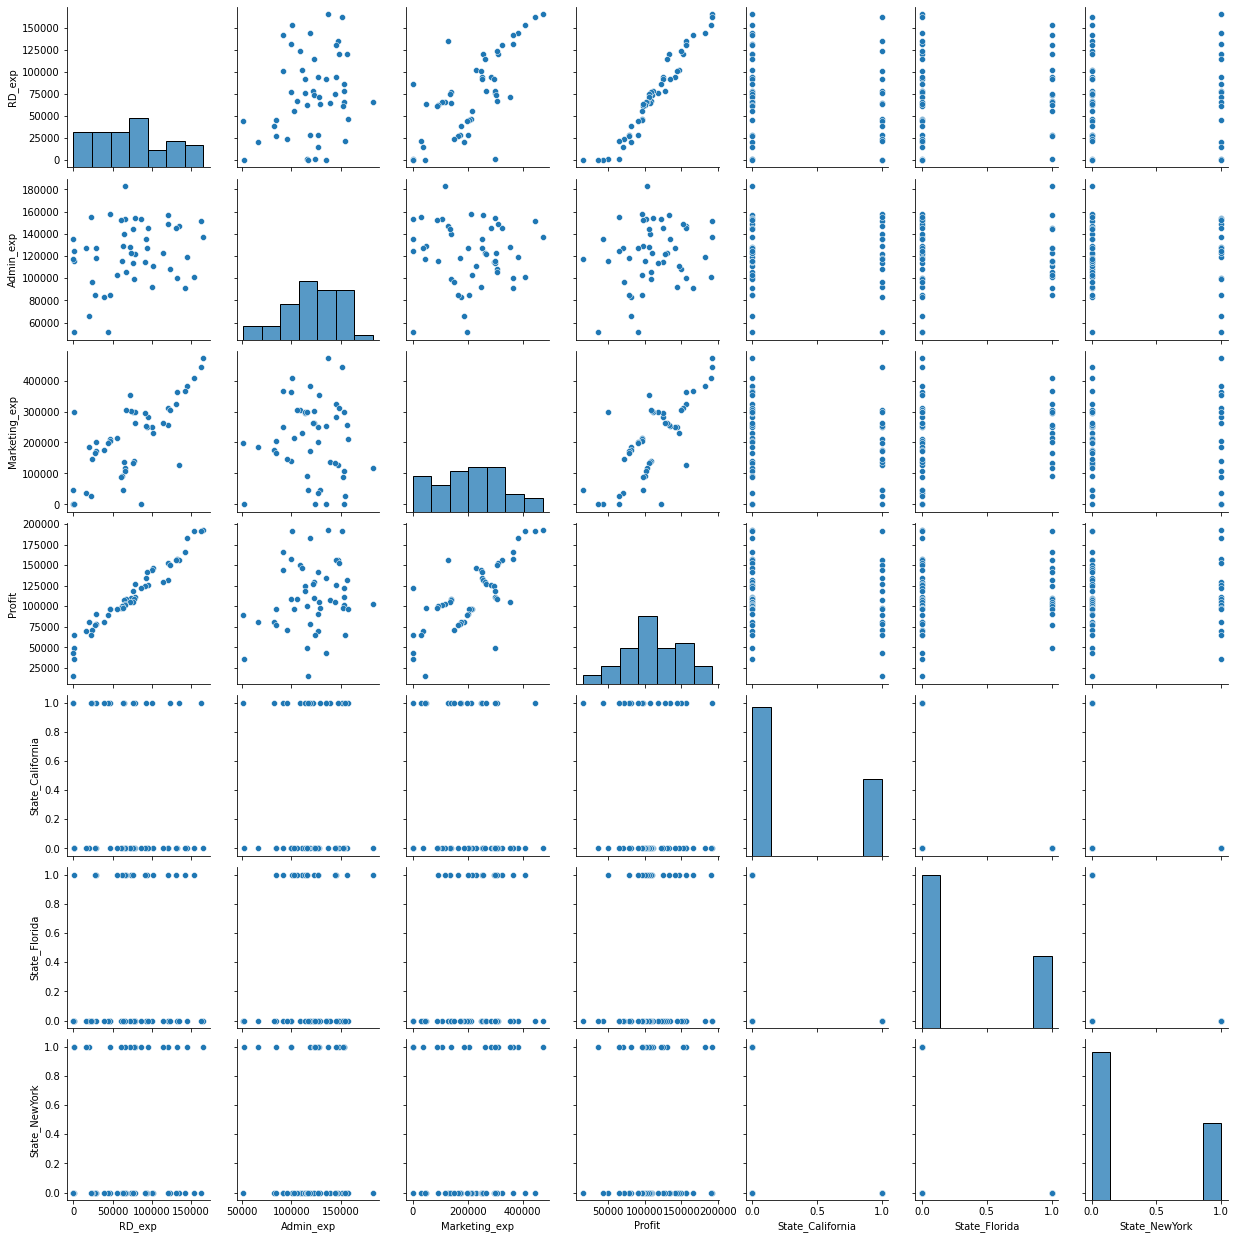

In [ ]:
sns.pairplot(startup_data)

##Normality Test

In [ ]:
startup_data.head(2)

,RD_exp,Admin_exp,Marketing_exp,Profit,State_California,State_Florida,State_NewYork
0,165349.2,136897.80,471784.10,192261.83,0,0,1
1,162597.7,151377.59,443898.53,191792.06,1,0,0


Probplot

In [ ]:
from scipy import stats

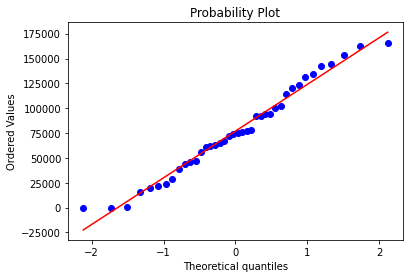

In [ ]:
stats.probplot(x = X_train['RD_exp'],dist='norm',plot = plt)
plt.show()

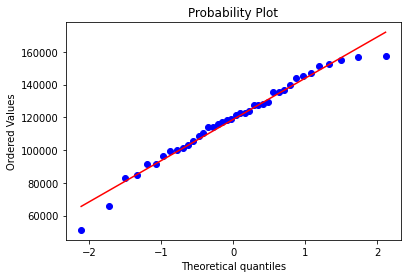

In [ ]:
stats.probplot(x = X_train['Admin_exp'],dist='norm',plot = plt)
plt.show()

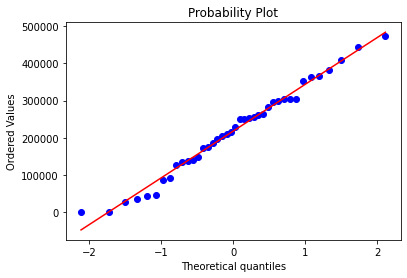

In [ ]:
stats.probplot(x = X_train['Marketing_exp'],dist='norm',plot = plt)
plt.show()

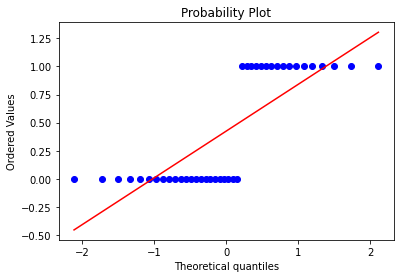

In [ ]:
stats.probplot(x = X_train['State_California'],dist='norm',plot = plt)
plt.show()

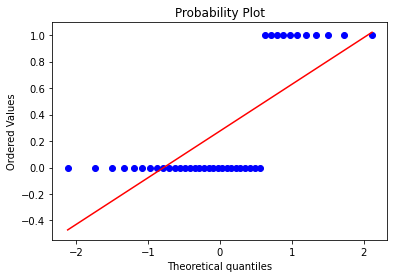

In [ ]:
stats.probplot(x = X_train['State_Florida'],dist='norm',plot = plt)
plt.show()

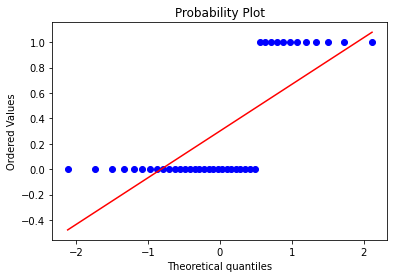

In [ ]:
stats.probplot(x = X_train['State_NewYork'],dist='norm',plot = plt)
plt.show()

In [ ]:
startup_data.skew()

RD_exp              0.164002
Admin_exp          -0.489025
Marketing_exp      -0.046472
Profit              0.023291
State_California    0.696595
State_Florida       0.795820
State_NewYork       0.696595
dtype: float64

##Multicollinearity Test

1. Correlation Matrix

In [ ]:
startup_data.corr()

,RD_exp,Admin_exp,Marketing_exp,Profit,State_California,State_Florida,State_NewYork
RD_exp,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Admin_exp,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing_exp,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_NewYork,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


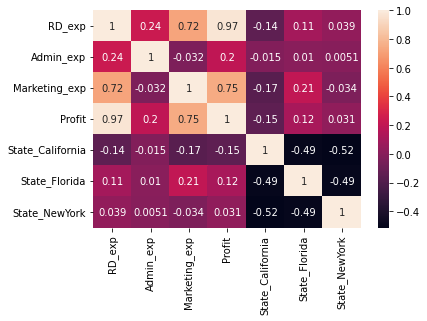

In [ ]:
sns.heatmap(startup_data.corr(),annot = True)

##AutoRegression Test

Passed as there is no time based data present.

##Homoscedasticity Test

**Note** - 

It can be only preformed post model training.

For Homoscedasticity check all you **input feature** should be in a **similar scale**.

Homoscedasticity test is passed when we have similar variance across 0.

It is a plot between Input vs Error (Error: y-y_pred)

In [ ]:
startup_data.head(2)

,RD_exp,Admin_exp,Marketing_exp,Profit,State_California,State_Florida,State_NewYork
0,165349.2,136897.80,471784.10,192261.83,0,0,1
1,162597.7,151377.59,443898.53,191792.06,1,0,0


Homoscedasticity Test

<function matplotlib.pyplot.show(*args, **kw)>

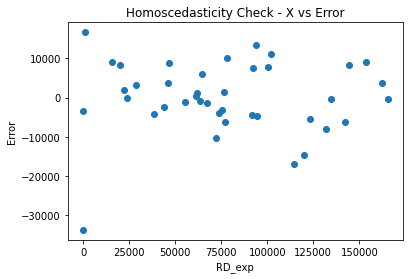

In [ ]:
plt.scatter(x = X_train['RD_exp'],y = train_error)  
plt.xlabel('RD_exp')
plt.ylabel('Error')
plt.title('Homoscedasticity Check - X vs Error')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

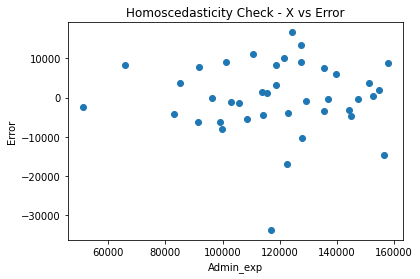

In [ ]:
plt.scatter(x = X_train['Admin_exp'],y = train_error)  
plt.xlabel('Admin_exp')
plt.ylabel('Error')
plt.title('Homoscedasticity Check - X vs Error')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

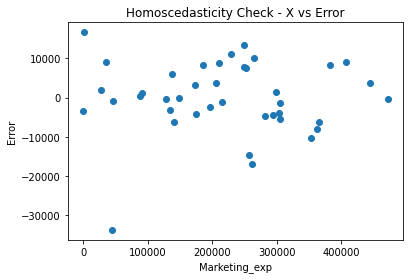

In [ ]:
plt.scatter(x = X_train['Marketing_exp'],y = train_error)  
plt.xlabel('Marketing_exp')
plt.ylabel('Error')
plt.title('Homoscedasticity Check - X vs Error')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

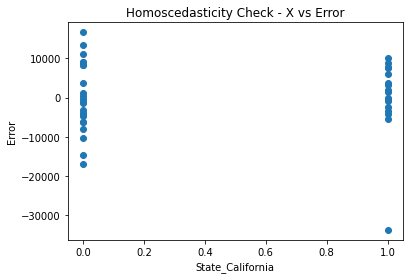

In [ ]:
plt.scatter(x = X_train['State_California'],y = train_error)  
plt.xlabel('State_California')
plt.ylabel('Error')
plt.title('Homoscedasticity Check - X vs Error')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

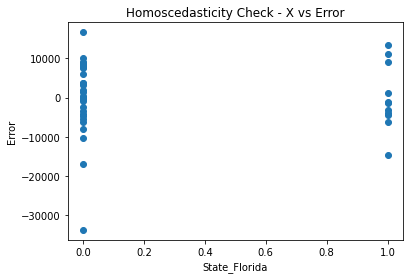

In [ ]:
plt.scatter(x = X_train['State_Florida'],y = train_error)  
plt.xlabel('State_Florida')
plt.ylabel('Error')
plt.title('Homoscedasticity Check - X vs Error')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

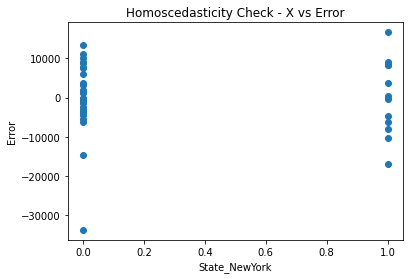

In [ ]:
plt.scatter(x = X_train['State_NewYork'],y = train_error)  
plt.xlabel('State_NewYork')
plt.ylabel('Error')
plt.title('Homoscedasticity Check - X vs Error')
plt.show

##Zero Residual Mean Test

**Note** - 

It can be only preformed post model training.

It's a plot between Actual Output Vs Predicted Output

In [ ]:
startup_data.head(2)

,RD_exp,Admin_exp,Marketing_exp,Profit,State_California,State_Florida,State_NewYork
0,165349.2,136897.80,471784.10,192261.83,0,0,1
1,162597.7,151377.59,443898.53,191792.06,1,0,0


<function matplotlib.pyplot.show(*args, **kw)>

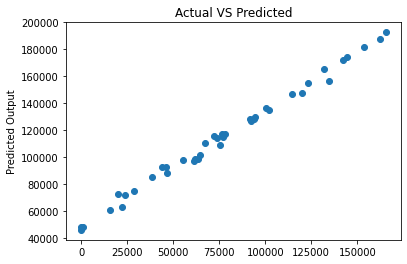

In [ ]:
plt.scatter(x = X_train['RD_exp'],y = y_pred_train) 
plt.ylabel('Predicted Output')
plt.title('Actual VS Predicted')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

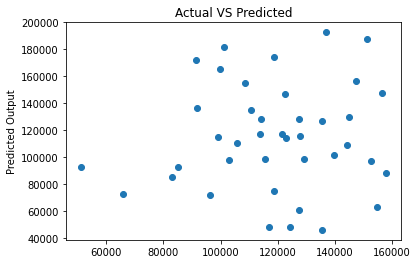

In [ ]:
plt.scatter(x = X_train['Admin_exp'],y = y_pred_train) 
plt.ylabel('Predicted Output')
plt.title('Actual VS Predicted')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

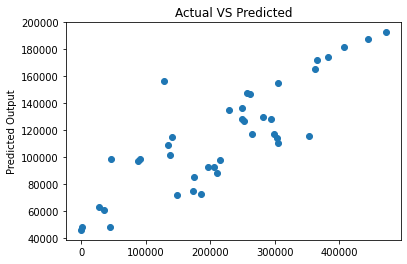

In [ ]:
plt.scatter(x = X_train['Marketing_exp'],y = y_pred_train) 
plt.ylabel('Predicted Output')
plt.title('Actual VS Predicted')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

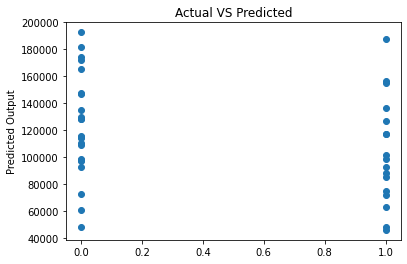

In [ ]:
plt.scatter(x = X_train['State_California'],y = y_pred_train) 
plt.ylabel('Predicted Output')
plt.title('Actual VS Predicted')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

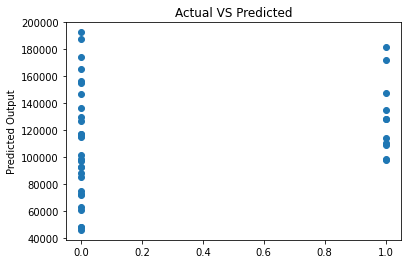

In [ ]:
plt.scatter(x = X_train['State_Florida'],y = y_pred_train) 
plt.ylabel('Predicted Output')
plt.title('Actual VS Predicted')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

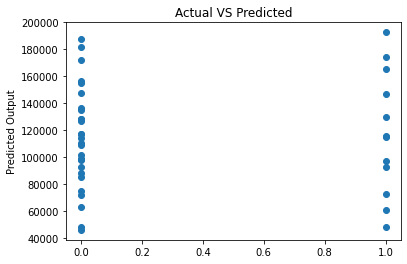

In [ ]:
plt.scatter(x = X_train['State_NewYork'],y = y_pred_train) 
plt.ylabel('Predicted Output')
plt.title('Actual VS Predicted')
plt.show